<a href="https://colab.research.google.com/github/aivrm/ai/blob/main/EX_3_my_First_Kaggle_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
#import os
from os.path import join

In [100]:
import pandas as pd

In [101]:
#data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
DATA_DIR = '/content/drive/MyDrive/_aiffel/aiffel/kaggle_kakr_housing/data'
train_data_path = join(DATA_DIR, 'train.csv')
test_data_path = join(DATA_DIR, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

In [102]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [103]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [104]:
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [105]:
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [106]:
# test 에도 동일하게 제거하여 주어야 한다.
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [107]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

In [108]:
import seaborn as sns

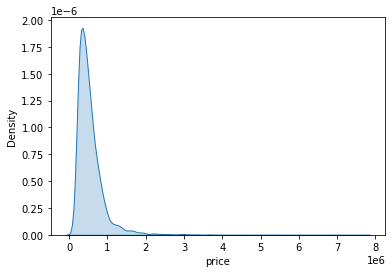

In [109]:
"""
seaborn의 `kdeplot`을 활용해 `y`의 분포를 확인
"""

#코드 작성
sns.kdeplot(y, shade=True)

---
log

---

In [110]:
import numpy as np

In [111]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

In [112]:
import matplotlib.pyplot as plt

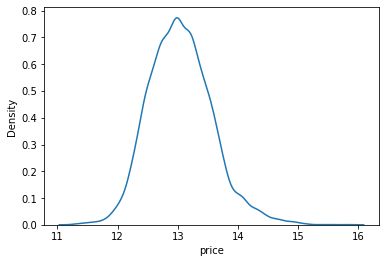

In [113]:
sns.kdeplot(y)
plt.show()

In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

---
### RMSE

---

RMSE 점수를 계산하기 위한 mean_squared_error

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

* 주의점

y_test나 y_pred는 위에서 np.log1p()로 변환이 된 값이기 때문에 원래 데이터의 단위에 맞게 되돌리기 위해 np.expm1()을 추가해야 한다.

exp로 다시 변환해서 mean_squared_error를 계산한 값에 np.sqrt를 취하면 RMSE 값을 얻을 수 있다.

In [116]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

모델 4가지
* XGBRegressor
* LGBMRegressor
* GradientBoostingRegressor
* RandomForestRegressor

In [117]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [118]:
#random_state=None  # 모델 내부에서 결정
random_state=2020   # 랜덤 시드도 영향을 미친다.

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

# 위의 4가지 모델을 models 라는 리스트로
models = [gboost, xgboost, lightgbm, rdforest]

각 모델의 이름

In [119]:
gboost.__class__.__name__

'GradientBoostingRegressor'

In [120]:
xgboost.__class__.__name__

'XGBRegressor'

In [121]:
lightgbm.__class__.__name__

'LGBMRegressor'

In [122]:
rdforest.__class__.__name__

'RandomForestRegressor'

* RMSE

이름으로 접근하여, for문 안에서 각 모델 별로 학습 및 예측을 해볼 수 있다.

In [123]:
df = {}

for model in models:
    # 모델 이름 획득
    model_name = model.__class__.__name__

    # train, test 데이터셋 분리 - 여기에도 random_state를 고정합니다. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)

    # 예측 결과의 rmse값 저장
    df[model_name] = rmse(y_test, y_pred)
    
    # data frame에 저장
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

[20:46:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'GradientBoostingRegressor': 128360.19649691365,
 'LGBMRegressor': 111920.36735892233,
 'RandomForestRegressor': 125487.07102453562,
 'XGBRegressor': 131067.44622809246}

get_scores(models, train, y) 함수

In [124]:
def get_scores(models, train, y):
    # 답안 작성
    df = {}

    for model in models:
        # 모델 이름 획득
        model_name = model.__class__.__name__

        # train, test 데이터셋 분리 - 여기에도 random_state를 고정합니다. 
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

        # 모델 학습
        model.fit(X_train, y_train)
        
        # 예측
        y_pred = model.predict(X_test)

        # 예측 결과의 rmse값 저장
        df[model_name] = rmse(y_test, y_pred)
        
        # data frame에 저장
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
        
        return score_df

In [125]:
get_scores(models, train, y)

,RMSE
GradientBoostingRegressor,128360.196497


---
하이퍼 파라미터 튜닝

---

sklearn.model_selection 라이브러리 의 GridSearchCV 클래스

In [126]:
from sklearn.model_selection import GridSearchCV

하이퍼 파라미터를 조합해 보는 방법

* 그리드 탐색 (grid search):<br>
사람이 먼저 탐색할 하이퍼 파라미터의 값들을 정해두고, 그 값들로 만들어질 수 있는 모든 조합을 탐색.
 특정 값에 대한 하이퍼 파라미터 조합을 모두 탐색하고자 할 때 유리

* 랜덤 탐색 (random search) :<br>
사람이 탐색할 하이퍼 파라미터의 공간만 정해두고, 그 안에서 랜덤으로 조합을 선택해서 탐색하는 방법

<br>

* 그리드 탐색에서는 사람이 정해둔 값들로 이루어지는 조합만 탐색하기 때문에 최적의 조합을 놓칠 수 있는 반면,

* 랜덤 탐색에서는 최적의 조합을 찾을 수 있는 가능성이 언제나 열려있지만,<br>
그 가능성 또한 랜덤성에 의존하기 때문에 언제나 최적을 찾는다는 보장은 없다.

그리드 탐색의 탐색 공간은 매우 제한적인 반면 랜덤 탐색은 탐색하는 공간이 훨씬 넓습니다.

GridSearchCV에 입력되는 인자들

* param_grid : 탐색할 파라미터의 종류 (딕셔너리로 입력)
* scoring : 모델의 성능을 평가할 지표
* cv : cross validation을 수행하기 위해 train 데이터셋을 나누는 조각의 개수
* verbose : 그리드 탐색을 진행하면서 진행 과정을 출력해서 보여줄 메세지의 양 (숫자가 클수록 더 많은 메세지를 출력)
* n_jobs : 그리드 탐색을 진행하면서 사용할 CPU의 개수
그러면 param_grid에 탐색할 xgboost 관련 하이퍼 파라미터를 넣어서 준비

In [127]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

In [128]:
model = LGBMRegressor(random_state=random_state)

In [129]:
grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2020), n_jobs=5,
             param_grid={'max_depth': [1, 10], 'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

실험 결과 저장 (grid_model.cv_results_ )

In [130]:
grid_model.cv_results_

{'mean_fit_time': array([0.241854  , 0.38238869, 1.30545397, 2.21820598]),
 'mean_score_time': array([0.01850839, 0.05161238, 0.06477833, 0.09240522]),
 'mean_test_score': array([-0.07339447, -0.05502043, -0.02917734, -0.02702714]),
 'param_max_depth': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'n_estimators': 50},
  {'max_depth': 1, 'n_estimators': 100},
  {'max_depth': 10, 'n_estimators': 50},
  {'max_depth': 10, 'n_estimators': 100}],
 'rank_test_score': array([4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([-0.0756974 , -0.05555652, -0.02885847, -0.02665428]),
 'split1_test_score': array([-0.07666447, -0.057876  , -0.03041465, -0.02795896]),
 'split2_test_score': array([-0.07354904, -0.05546079, 

어떤 파라미터 조합일 때 점수가 어떻게 나오는가?

파라미터 조합은 위 딕셔너리 중 params에,
각각에 대한 테스트 점수는 mean_test_score에 저장되어 있음.

In [131]:
params = grid_model.cv_results_['params']
params

[{'max_depth': 1, 'n_estimators': 50},
 {'max_depth': 1, 'n_estimators': 100},
 {'max_depth': 10, 'n_estimators': 50},
 {'max_depth': 10, 'n_estimators': 100}]

In [132]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.07339447, -0.05502043, -0.02917734, -0.02702714])

params에는 각 파라미터의 조합이,
score에는 각 조합에 대한 점수가 들어가 있음.

이 2개로 데이터 프레임을 만들고 최적의 성능을 내는 하이퍼 파라미터의 조합을 찾기.

In [133]:
results = pd.DataFrame(params)
results['score'] = score

results

,max_depth,n_estimators,score
0,1,50,-0.073394
1,1,100,-0.055020
2,10,50,-0.029177
3,10,100,-0.027027


score 는 음수.

GridSearchCV로 grid_model 모델을 초기화할 때, scoring 인자 넣은 값은?

MSE에 음수를 취한 값인 neg_mean_squared_error를 입력했었음.

* RMSE 점수

음수로 된 MSE였으니, -1을 곱해주고 np.sqrt로 루트 연산을 해주면 됨.

In [134]:
results['RMSE'] = np.sqrt(-1 * results['score'])
results

,max_depth,n_estimators,score,RMSE
0,1,50,-0.073394,0.270914
1,1,100,-0.055020,0.234564
2,10,50,-0.029177,0.170814
3,10,100,-0.027027,0.164399


10만 단위의 RMSE와는 값의 크기가 아주 다름.

앞서 price의 분포가 한쪽으로 치우쳐져 있는 것을 보고 log 변환을 했었음.
그 후 RMSE 값을 계산하기 위한 함수에서는 np.expm1 함수를 활용해 다시 원래대로 복원한 후 RMSE 값을 계산했었음.

하지만 그리드 탐색을 하면서는 np.expm1()으로 변환하는 과정이 없었기 때문에 log 변환되어 있는 price 데이터에서 손실함수값을 계산한 것.

따라서 정확히 말하면 RMSE가 아니라 RMSLE, 즉 Root Mean Squared Log Error 이다. (log를 취한 값에서 RMSE를 구했다는 뜻)

이름을 변경함.

In [135]:
results = results.rename(columns={'RMSE': 'RMSLE'})
results

,max_depth,n_estimators,score,RMSLE
0,1,50,-0.073394,0.270914
1,1,100,-0.055020,0.234564
2,10,50,-0.029177,0.170814
3,10,100,-0.027027,0.164399


In [136]:
# 위의 표를 `RMSLE`가 낮은 순서대로 정렬
results = results.sort_values('RMSLE')
results

,max_depth,n_estimators,score,RMSLE
3,10,100,-0.027027,0.164399
2,10,50,-0.029177,0.170814
1,1,100,-0.055020,0.234564
0,1,50,-0.073394,0.270914


---
새로운 진행

---

In [137]:
"""
다음과 같은 과정을 진행할 수 있는 `my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)` 함수를 구현해 보세요.

1. GridSearchCV 모델로 `model`을 초기화합니다.
2. 모델을 fitting 합니다.
3. params, score에 각 조합에 대한 결과를 저장합니다. 
4. 데이터 프레임을 생성하고, RMSLE 값을 추가한 후 점수가 높은 순서로 정렬한 `results`를 반환합니다.
"""

# 코드 입력
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

---
위의 my_GridSearch() 함수로, 그리드 탐색

---

In [138]:
param_grid = {
    'n_estimators': [50, 100, 500, 1000],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


,max_depth,n_estimators,score,RMSLE
6,10,500,-0.026245,0.162004
7,10,1000,-0.026739,0.163521
5,10,100,-0.027027,0.164399
4,10,50,-0.029177,0.170814
3,1,1000,-0.036517,0.191094
2,1,500,-0.039049,0.197607
1,1,100,-0.055020,0.234564
0,1,50,-0.073394,0.270914


가장 좋은 조합은 max_depth=10, n_estimators=100

    max_depth=10, n_estimators=1000 로 모델 구성.
    학습
    예측


In [139]:
model = LGBMRegressor(max_depth=10, n_estimators=1000, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction

array([13.19495169, 13.11873096, 14.01893003, ..., 13.05179856,
       12.72122862, 13.00310932])

예측 결과에 np.expm1()을 씌워서, 다시 원래 스케일로 되돌리는 것도 잊으면 안됨.

In [140]:
prediction = np.expm1(prediction)
prediction

array([ 537642.88051594,  498186.08760612, 1225585.45639546, ...,
        465932.667101  ,  334778.91334668,  443790.13608839])

sample_submission.csv


In [141]:
# data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
# DATA_DIR = '/content/drive/MyDrive/_aiffel/aiffel/kaggle_kakr_housing/data' # 위에서 설정 완료.

submission_path = join(DATA_DIR, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


price 에 예측값을 덮어 씀.

In [142]:
submission['price'] = prediction
submission.head()

,id,price
0,15035,5.376429e+05
1,15036,4.981861e+05
2,15037,1.225585e+06
3,15038,2.809225e+05
4,15039,3.260536e+05


파일 이름에 모델의 종류와 RMSLE 값을 붙여서 csv화일로 저장.

In [143]:
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(DATA_DIR, 'lgbm', '0.163521')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/content/drive/MyDrive/_aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.163521.csv


In [144]:
"""
1. 모델을 `train`, `y`로 학습.
2. `test`에 대해 예측.
3. 예측값을 `np.expm1`으로 변환하고, `submission_model_name_RMSLE_100000.csv` 형태의 `csv` 파일을 저장.
"""

# 코드 작성
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    # 위에서 data
    # data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(DATA_DIR, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(DATA_DIR, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

실행



In [145]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.163521')

/content/drive/MyDrive/_aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.163521.csv saved!


* 제출

https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr


---
## 회고

---

처음에는 19만 정도였으나,
2번째 시도에서는 15만이 되었다.

n_estimators 를 500을 주었으나, 11만이 조금 넘어서,
n_estimators 를 1000 을 주니, 11만 이내 들어갔었다.

캐글을 어떻게 제출하고 순위를 받는지 알게 되었다.

내 첫 캐글 제출은 이렇게 이루어졌다.


자유롭게 데이터를 다루며,
캐글에 마구마구 submission을 투척할 그 날을 고대하며~~~